In [18]:
#importing libraires 
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [19]:
#creating a series with all the urls
sports_teams = {
    'mens_volleyball' : ['https://ccnyathletics.com/sports/mens-volleyball/roster', 'https://lehmanathletics.com/sports/mens-volleyball/roster', 'https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster', 
                         'https://johnjayathletics.com/sports/mens-volleyball/roster', 'https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster', 'https://mecathletics.com/sports/mens-volleyball/roster', 
                         'https://www.huntercollegeathletics.com/sports/mens-volleyball/roster', 'https://yorkathletics.com/sports/mens-volleyball/roster', 'https://ballstatesports.com/sports/mens-volleyball/roster'],
    'womens_volleyball' : ['https://bmccathletics.com/sports/womens-volleyball/roster', 'https://yorkathletics.com/sports/womens-volleyball/roster', 'https://hostosathletics.com/sports/womens-volleyball/roster', 'https://bronxbroncos.com/sports/womens-volleyball/roster/2021',
                           'https://queensknights.com/sports/womens-volleyball/roster', 'https://augustajags.com/sports/wvball/roster', 'https://flaglerathletics.com/sports/womens-volleyball/roster', 'https://pacersports.com/sports/womens-volleyball/roster',
                           'https://www.golhu.com/sports/womens-volleyball/roster'],
    'mens_swimming' : ['https://csidolphins.com/sports/mens-swimming-and-diving/roster', 'https://yorkathletics.com/sports/mens-swimming-and-diving/roster', 'https://athletics.baruch.cuny.edu/sports/mensswimming-and-diving/roster', 'https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster'
                       'https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster', 'https://mckbearcats.com/sports/mens-swimming-and-diving/roster', 'https://ramapoathletics.com/sports/mens-swimming-and-diving/roster', 
                       'https://oneontaathletics.com/sports/mens-swimming-and-diving/roster', 'https://bubearcats.com/sports/mens-swimming-and-diving/roster/2021-22', 'https://albrightathletics.com/sports/mens-swimming-and-diving/roster/2021-22'],                
    'womens_swimming' : ['https://csidolphins.com/sports/womens-swimming-and-diving/roster', 'https://queensknights.com/sports/womens-swimming-and-diving/roster', 'https://yorkathletics.com/sports/womens-swimming-and-diving/roster', 'https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?path=wswim', 'https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster', 'https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster', 'https://mckbearcats.com/sports/womens-swimming-and-diving/roster', 'https://ramapoathletics.com/sports/womens-swimming-and-diving/roster', 'https://keanathletics.com/sports/womens-swimming-and-diving/roster', 'https://oneontaathletics.com/sports/womens-swimming-and-diving/roster']
}

In [20]:
#defining function that scrapes each websites and puts the data in in a data frame and creates a csv file  
def scraping(team_type, links):
  
  #stores the athletes names and heights 
  names = []
  numerical_heights = []

  #scrapes the raw html with the height and name information  
  for url in links:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    raw_names = soup.find_all('td', class_ ='sidearm-table-player-name')
    raw_heights = soup.find_all('td', class_ = 'height')
    
    #strips raw html with the name info down to just the text, splits the name at the whitespace, removes the brackets then appends the final result to the names list
    for raw_name in raw_names:
      split = raw_name.get_text().split()
      string = str(split)
      strip = string.strip('[]')
      names.append(strip)

    #for loop for the athletes heights 
    for raw_height in raw_heights:
      
      #extracts the text from the raw html 
      x = raw_height.get_text()
    
      #variables for the for loop and average   
      count = 0
      sum = 0
      
      #skips nonsensical values while scraping  
      if x == '-':
        numerical_heights.append(x)
        continue
      
      #Converts the heights to inches 
      feet = float(x.split('-')[0]) * 12
      inches = float(x.split('-')[1])
      total = feet + inches
      
      #add each heights to the total sum variable which is used to calculate the average 
      sum += total
      
      #the count varible counts how many athlethes there are with thier heights listed. This is used to calculate the average.
      count += 1 
      
      #numerical heights get appedned with the total 
      numerical_heights.append(total)

    average = sum/count

    #the nonsensical values gets updated with the average 
    for x in range(0, len(numerical_heights)):
      if numerical_heights[x] == '-':
        numerical_heights[x] = average

  #creates dataframe and .csv file
  filename = team_type + '.csv'
  df = pd.DataFrame()
  df['name'] = names
  df['heights'] = numerical_heights
  df.to_csv(filename, index=False)
  return df

In [21]:
#Calling the function for each team type to generate the dataframes and csv files 
mens_volleyball_df = scraping('mens_volleyball', sports_teams['mens_volleyball'])
womens_volleyball_df = scraping('womens_volleyball', sports_teams['womens_volleyball'])
mens_swimming_df = scraping('mens_swimming', sports_teams['mens_swimming'])
womens_swimming_df = scraping('womens_swimming', sports_teams['womens_swimming'])

In [22]:
#Calculates the average height of each dataframe 
mens_swimming_avg = mens_swimming_df['heights'].mean()
womens_swimming_avg = womens_swimming_df['heights'].mean()
mens_volleyball_avg = mens_volleyball_df['heights'].mean()
womens_volleyball_avg = womens_volleyball_df['heights'].mean()

In [23]:
#Creates dataframe of all the averages and team types 
average_heights = pd.DataFrame(
                                        {
                                            'Team Type': ['Mens Swim Team', 'Womens Swim Team', 'Mens Volleyball Team', 'Womens Volleyball Team'],
                                            'Avg': [mens_swimming_avg, womens_swimming_avg, mens_volleyball_avg, womens_volleyball_avg]

                                        }
                               )

average_heights

,Team Type,Avg
0,Mens Swim Team,71.539823
1,Womens Swim Team,65.695364
2,Mens Volleyball Team,72.091667
3,Womens Volleyball Team,67.617886


In [24]:
#defining a function that generates the athletes wih the five tallest heights 
def tallest (team_type, f):
 
  #finds all the unique heights and sorts them from descending order 
  unique_heights = list(f['heights'].unique())
  unique_heights.sort(reverse = True)
  
  #finds the five tallest heights 
  fifth_tallest = unique_heights [4]
  
  #filter mask will show only the five tallest heights 
  filter_mask = f['heights'] >= fifth_tallest
  tallest_athletes = f[filter_mask]
 
  print(f'The athletes on the {team_type} team with the five tallest heights are:')
  return tallest_athletes.sort_values(by = 'heights', ascending = False)

In [25]:
#defining a function that generates the athletes with the five shortest heights 
def shortest (team_type, f):
  #finds all the unique heights 
  unique_heights = list(f['heights'].unique())
  unique_heights.sort()
  
  #finds the 5 shortest heights 
  fifth_shortest = unique_heights [4]
  
  #filter mask willonly show the five shortest heights 
  filter_mask = f['heights'] <= fifth_shortest
  shortest_athletes = f[filter_mask]
  
  print(f'The athletes on the {team_type} team with the five shortest heights are:')
  return shortest_athletes.sort_values(by = 'heights')

In [26]:
#calls the tallest function for each team type 
tallest ("Men's Volleyball", mens_volleyball_df)

The athletes on the Men's Volleyball team with the five tallest heights are:


,name,heights
67,"'Akil', 'Vaughn'",79.0
48,"'Kyle', 'Barriffe', 'Johnson'",79.0
104,"'Griffin', 'Satterfield'",79.0
89,"'Matisse', 'Lee-Maarek'",78.0
116,"'Eyal', 'Rawitz'",78.0
115,"'Tinaishe', 'Ndavazocheva'",78.0
111,"'Dyer', 'Ball'",78.0
108,"'Jakub', 'Wiercinski'",78.0
106,"'Vanis', 'Buckholz'",78.0
105,"'Trevor', 'Phillips'",78.0


In [27]:
tallest ("Women's Volleyball", womens_volleyball_df)

The athletes on the Women's Volleyball team with the five tallest heights are:


,name,heights
120,"'Alyssa', 'Daley'",75.0
87,"'Molly', 'Boyd'",75.0
70,"'Kayli', 'Cleaver'",74.0
104,"'Kaitlyn', 'Lund'",74.0
83,"'Logan', 'Garcia'",74.0
74,"'Madelyn', 'Eden'",74.0
47,"'Taylor', 'Smith'",74.0
62,"'Deirdre', 'McCarthy'",74.0
85,"'Audrey', 'Simmons'",73.0
110,"'Samantha', 'Swenby'",73.0


In [28]:
tallest ("Men's Swimming", mens_swimming_df)

The athletes on the Men's Swimming team with the five tallest heights are:


,name,heights
25,"'Colton', 'Grimes'",78.0
90,"'Eric', 'Kroon'",77.0
45,"'Gavin', 'Wagner'",77.0
69,"'Kyle', 'Copper'",76.0
106,"'Nicholas', 'Griffith'",76.0
41,"'Matthew', 'Stooke'",76.0
86,"'Brian', 'Harding'",76.0
22,"'Ian', 'Garwold'",75.0
101,"'Henry', 'Shemet'",75.0
93,"'Ryan', 'Maierle'",75.0


In [29]:
tallest ("Women's Swimming", womens_swimming_df)

The athletes on the Women's Swimming team with the five tallest heights are:


,name,heights
84,"'McKenzie', 'Fazio'",73.0
65,"'Maja', 'Piotrowicz'",73.0
40,"'Ayatallah', 'Elkotby'",72.0
90,"'Payton', 'Kollmorgen'",71.0
71,"'Stefania', 'Sigurthorsdottir'",71.0
88,"'Presley', 'Heitzmann'",71.0
49,"'Kornelia', 'Buszka'",71.0
122,"'Grace', 'Geyer'",71.0
101,"'Jocelyn', 'Zgola'",70.0
56,"'Adi', 'Luker'",70.0


In [30]:
#calling the shortest variable for each team type 
shortest ("Men's Volleyball", mens_volleyball_df)

The athletes on the Men's Volleyball team with the five shortest heights are:


,name,heights
0,"'Angel', 'Gabriel', 'Chabla'",63.0
16,"'Chris', 'Mata'",63.0
34,"'Bryce', 'Glasper'",64.0
65,"'Jonathan', 'Liao'",65.0
22,"'Wai', 'Lin'",65.0
32,"'Dion', 'Csikortos'",65.0
12,"'Ray', 'Rodriguez'",67.0
53,"'Naoki', 'Tani'",67.0
5,"'David', 'Reyes', 'Galvez'",67.0
36,"'Carlos', 'Llivicura'",67.0


In [31]:
shortest ("Women's Volleyball", womens_volleyball_df)

The athletes on the Women's Volleyball team with the five shortest heights are:


,name,heights
18,"'Alma', 'Romero'",59.0
25,"'Maryam', 'Khan'",60.0
4,"'Garyana', 'Altidor'",61.0
107,"'Izabella', 'De', 'Lima'",61.0
1,"'Jamielee', 'Adomo'",62.0
8,"'Megan', 'Rivera'",62.0
17,"'Shamonie', 'Miller'",62.0
0,"'Amy', 'Criollo'",63.0
7,"'Albina', 'Rugova'",63.0
13,"'Naomi', 'Heras', 'Picon'",63.0


In [32]:
shortest ("Men's Swimming", mens_swimming_df)

The athletes on the Men's Swimming team with the five shortest heights are:


,name,heights
2,"'Charles', 'Cusumano'",64.0
53,"'Samuel', 'De', 'Leon'",65.0
81,"'Zachary', 'Ciriaco'",66.0
74,"'James', 'Llewellyn'",66.0
57,"'AJ', 'Guevara'",66.0
84,"'Christopher', 'Egan'",66.0
51,"'Tyler', 'Canteen'",66.0
6,"'William', 'Kwan'",66.0
47,"'Devin', 'Alejado'",67.0
8,"'Sam', 'Rozenfeld'",67.0


In [33]:
shortest ("Women's Swimming", womens_swimming_df)

The athletes on the Women's Swimming team with the five shortest heights are:


,name,heights
20,"'Melanie', 'Rodriguez'",59.0
9,"'Rupakshi', 'Aggarwal'",59.0
12,"'Claudia', 'Cimino'",59.0
23,"'Micaela', 'Reyes'",59.0
29,"'Amanda', 'Lee'",61.0
10,"'Asha', 'Besaw'",61.0
123,"'Taylor', 'Jacobson'",61.0
106,"'Rica', 'De', 'Leon'",61.0
110,"'Valeria', 'Pages'",61.0
16,"'Kristen', 'Flores'",61.0


<Axes: title={'center': 'Average Heights Among the Different Team Categories'}, xlabel='Team Type'>

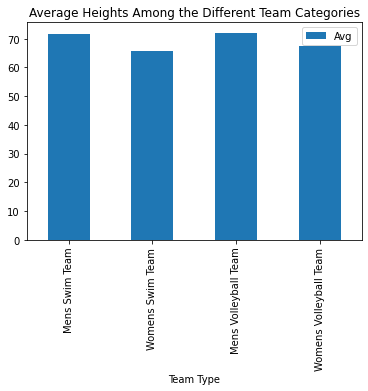

In [34]:
#bar graph for each team tyoe average 
average_heights.plot.bar(x ='Team Type', y = 'Avg', rot= 90, title ='Average Heights Among the Different Team Categories')